In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
test = np.load("../data/test.npy")

In [3]:
test.shape

(1440, 100, 100)

In [4]:
results = np.load("../results/cnn_convlstm_seq2seq_win11_3/predictions.npy", allow_pickle=True)

In [5]:
results[0]['targets'].shape

(10000, 12)

In [6]:
first_sample = results[0]

targets = first_sample["targets"]
print(targets.shape)
# print(targets)

predictions = first_sample["predictions"]
print(predictions.shape)
# print(predictions)

inputs = first_sample["input"]
print(inputs.shape)

(10000, 12)
(10000, 12, 1)
(10000, 12, 11, 11)


In [7]:
test[12].shape
targets.shape

(10000, 12)

In [8]:
np.allclose(test[12], targets[:, 0].reshape(100, 100))

True

In [9]:
def draw_grid(data):
    plt.pcolormesh(data, cmap='terrain',  vmin=-0.51, vmax=3.7)
#     plt.colorbar(label="Traffic volume")

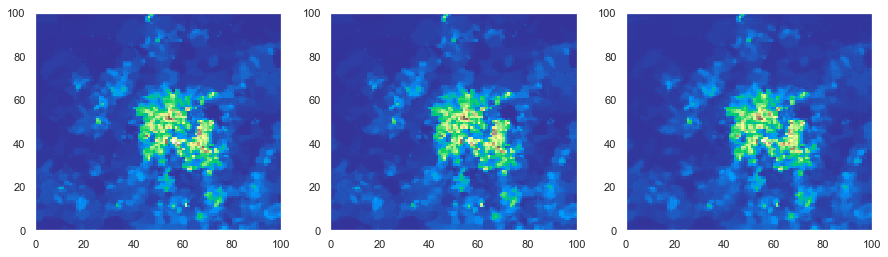

In [10]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
draw_grid(test[12])

plt.subplot(1, 3, 2)
draw_grid(targets[:, 0].reshape(100, 100))

plt.subplot(1, 3, 3)
draw_grid(predictions[:, 0].reshape(100, 100))

In [12]:
def single_cell_prediction(inputs, targets, predictions, cell=(47, 55)):
    x_grid = np.arange(inputs.shape[1]) * 10
    x_grid_2 = (np.arange(targets.shape[1]) + inputs.shape[1]) * 10
    
    # inputs shape is (10000, 12, 11, 11)
    input_points = inputs.reshape(100, 100, 12, 11, 11)[cell[0], cell[1], :, 5, 5]
    # targets shape is (10000, 12)
    target_points = targets.reshape(100, 100, 12)[cell]
    # predictions shape is (10000, 12)
    prediction_points = predictions.reshape(100, 100, 12)[cell]
    
    plt.plot(x_grid, input_points, label="inputs")
    plt.plot(x_grid_2, target_points, label="targets")
    plt.plot(x_grid_2, prediction_points, label="predictions")
    
    plt.legend()
    
    return (min(np.min(input_points), np.min(target_points), np.min(prediction_points)),
        max(np.max(input_points), np.max(target_points), np.max(prediction_points)))

In [13]:
def plot_cells(inputs, targets, predictions, cells=None):
    if cells is None:
        cells = [(47, 55), (50, 55), (55, 57), 
                 (40, 50), (20, 20), (60, 70),
                 (47, 53), (55, 55), (48, 56)]
        
    n_rows = len(cells) // 3
    
    plt.figure(figsize=(17, 3.35 * n_rows))

    min_value = float('inf')
    max_value = -float('inf')
    axis = []
    for i, cell in enumerate(cells):
        ax = plt.subplot(n_rows, 3, i+1)
        axis.append(ax)
        min_cand, max_cand = single_cell_prediction(inputs, targets, predictions, cell=cell)

        # find min and max values for axis limits
        if min_cand < min_value:
            min_value = min_cand

        if max_cand > max_value:
            max_value = max_cand

    # set constant axis limits for all plots for better visual representation
    print(f"max: {max_value}")
    for ax in axis:
        ax.set_ylim([min_value - 0.5, max_value + 0.5])

max: 3.439322063488198


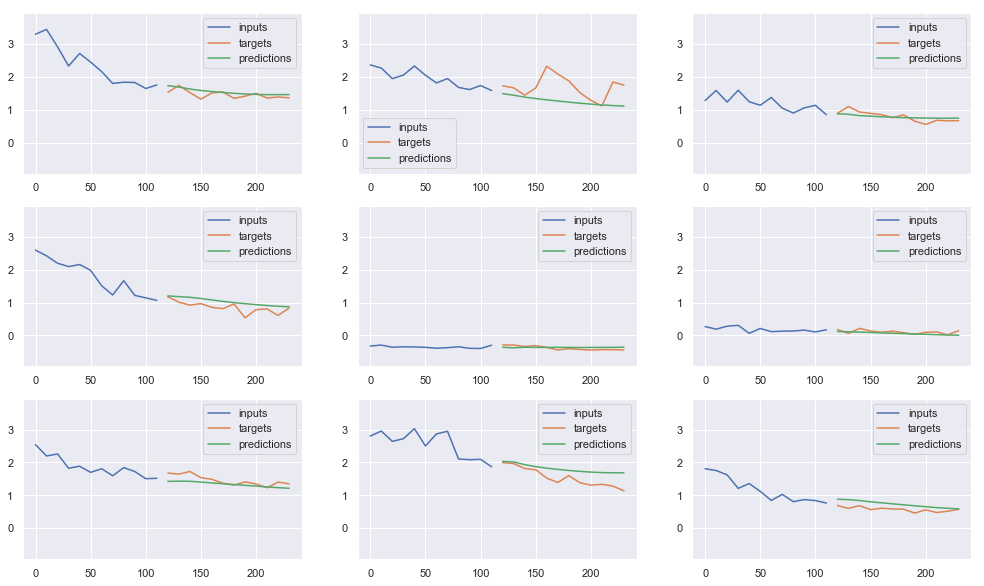

In [14]:
plot_cells(inputs, targets, predictions)

In [15]:
third_sample = results[2]

targets_3 = third_sample["targets"]
predictions_3 = third_sample["predictions"]
inputs_3 = third_sample["input"]

max: 12.064108453288886


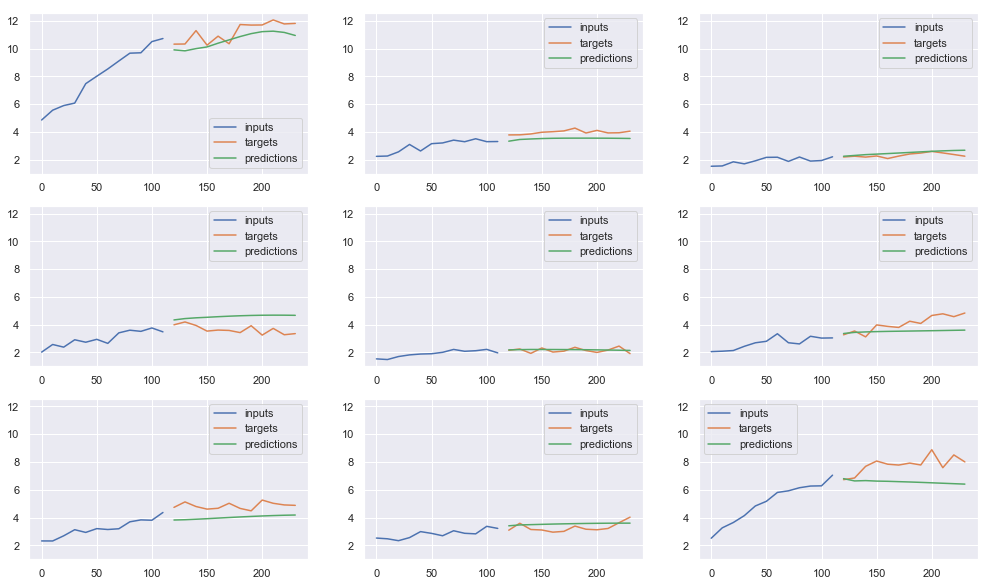

In [16]:
cells = [(47, 55), (50, 55), (55, 57), 
         (40, 50), (50, 51), (48, 50),
         (47, 53), (55, 55), (48, 56)]
plot_cells(inputs_3, targets_3, predictions_3, cells=cells)

### Extreme values

max: 29.042480944099193


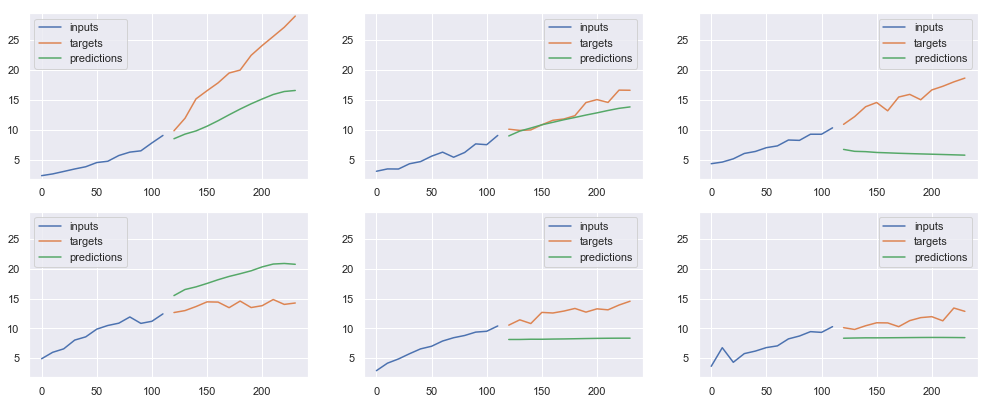

In [17]:
cells = [(48, 60), (47, 61), (49, 58),
         (47, 58), (48, 58), (47, 57)]
plot_cells(inputs_3, targets_3, predictions_3, cells=cells)

In [18]:

np.where(targets_3 > 13)

(array([4757, 4758, 4758, 4758, 4758, 4758, 4758, 4758, 4758, 4758, 4758,
        4761, 4761, 4761, 4761, 4761, 4858, 4858, 4858, 4858, 4858, 4860,
        4860, 4860, 4860, 4860, 4860, 4860, 4860, 4860, 4860, 4861, 4861,
        4861, 4958, 4958, 4958, 4958, 4958, 4958, 4958, 4958, 4958, 4958,
        4960, 4960, 4960, 4960, 4960]),
 array([10,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  7,  8,  9, 10, 11,  6,
         8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  9, 10, 11,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  7,  8,  9, 10, 11]))

In [19]:
test = np.load("../data/test.npy")

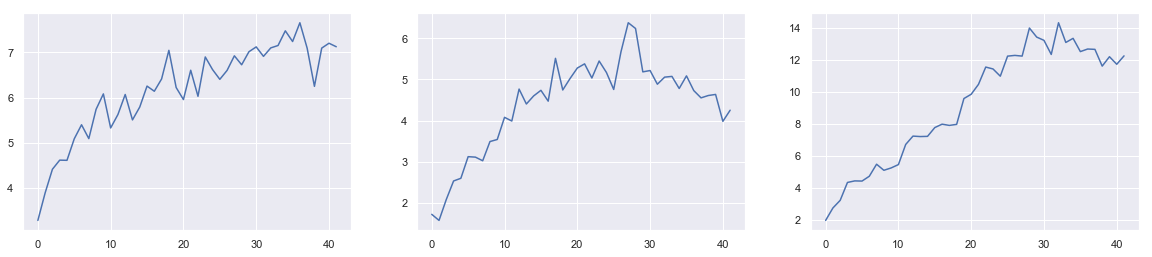

In [149]:
length = 42

plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
start= 49
plt.plot(test[start:start+length, 38, 63])

plt.subplot(1, 3, 2)
start= 190
plt.plot(test[start:start+length, 48, 55])
# start= 100
# plt.plot(test[start:start+length, 49, 58])

plt.subplot(1, 3, 3)
start= 190
plt.plot(test[start:start+length, 49, 58])
# start= 650
# plt.plot(test[start:start+length, 47, 58])

In [455]:
def plot_predictions(ground_truth, prediction_list, input_len, output_len, last_one, remove_y_labels,
                             train_mean=67.61768898039853, train_std=132.47248595705986):
    ground_truth = ground_truth * train_std + train_mean
    # inputs, targets, predictions - 1 dimensional arrays
    
    step_size = 10
    
    x_grid = np.arange(input_len + output_len) * step_size
    x_grid_2 = (np.arange(output_len) + input_len) * step_size
    
    plt.style.use('default')
    plt.rcParams.update({'font.size': 15})
    
    plt.axvline(x=input_len * step_size, linestyle="--", color='gray', linewidth=1, label='prediction start')
#     plt.text(100, 700, "prediction start", horizontalalignment='center', verticalalignment='center', rotation=90)

    xtick_positions = np.arange(0, x_grid[-1] + 11, 60)
    xtick_labels = xtick_positions // 60
    plt.xticks(xtick_positions, xtick_labels)
    
    plt.plot(x_grid, ground_truth, label="ground truth", linewidth=1.5, marker='.', markersize=7)
    
    for predictions in prediction_list:
        pred = predictions['values'] * train_std + train_mean
        plt.plot(x_grid_2, pred, label=predictions['name'], color=predictions['color'])
        
    axis = plt.gca()
    if last_one:
        axis.set_xlabel("Time (hours)")
    axis.set_xlim(left=0, right=xtick_positions[-1])
    
    if not remove_y_labels:
        axis.set_ylabel("Traffic volume (CDRs)")
        
    if remove_y_labels:
        plt.yticks([])
    
def plot_multiple_predictions(data, locations, pred_list, input_len=12, output_len=30, n_rows=2, n_cols=3,
                             file=None, remove_y_labels=False):
    def loc_key(loc):
        return f"{loc['from']}_{loc['cell'][0]}_{loc['cell'][1]}"
    
    col_width = 6.6 * (0.8673 if remove_y_labels else 1)
    fig = plt.figure(figsize=(n_cols * col_width, n_rows * 3.5))

    for i, loc in enumerate(locations):
        plt.subplot(n_rows, n_cols, i+1)
        
        ground_truth = data[loc['from']:loc['from'] + input_len + output_len, loc['cell'][0], loc['cell'][1]]
        location_specific_predictions = [{'values': p['values'][loc_key(loc)], 'name': p['name'],
                                         'color': p['color']} for p in pred_list]
        last_one = i == len(locations) - 1
        plot_predictions(ground_truth, location_specific_predictions, input_len, output_len, 
                         last_one, remove_y_labels)
        
    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2)

    # (left, bottom, right, top)
    fig.tight_layout(rect=(0, 0.1, 1, 1))
    
    if not file is None:
        plt.savefig(file, bbox_inches='tight')

In [399]:
convlstm_seq_pred = np.load("../results/convlstm_seq2seq_gc_pred30/predictions.npy", allow_pickle=True).item()
cnn_convlstm_pred = np.load("../results/cnn_convlstm_seq2seq_win11_pred30_2/predictions.npy", allow_pickle=True).item()
attention_pred = np.load("../results/cnn_convlstm_attention_hardcoded_pred30/predictions.npy", allow_pickle=True).item()
predrnn_pred = np.load("../results/predrnn_3/predictions.npy", allow_pickle=True).item()


In [384]:
pred_list = [
#     { 'name': 'seq2seq LSTM', 'values': lstm_seq_pred, 'color': 'purple'},
    { 'name': 'CNN-ConvLSTM', 'values': cnn_convlstm_pred, 'color': 'purple'},
    { 'name': 'CNN-ConvLSTM+A', 'values': attention_pred, 'color': '#3ed1d6'},
    { 'name': 'seq2seq ConvLSTM', 'values': convlstm_seq_pred, 'color': 'red'},
    { 'name': 'PredRNN++', 'values': predrnn_pred, 'color': 'black'}
]

locations = [
    {'from': 49, 'cell': (49, 58)},
    {'from': 49, 'cell': (38, 63)},
    {'from': 100, 'cell': (49, 58)},
    {'from': 190, 'cell': (48, 55)},
    {'from': 190, 'cell': (49, 58)},
    {'from': 650, 'cell': (47, 58)}
]

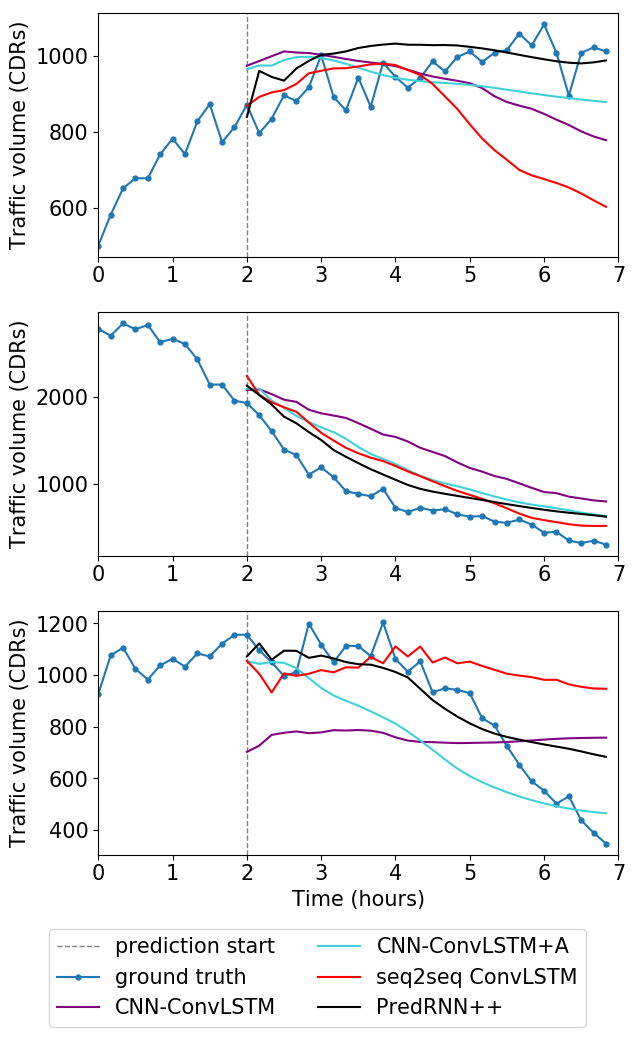

In [422]:
locations2 = [
    {'from': 49, 'cell': (38, 63)},
    {'from': 100, 'cell': (49, 58)},
    {'from': 650, 'cell': (47, 58)}
]

plot_multiple_predictions(test, locations2, pred_list, n_rows=3, n_cols=1, file="predictions_mine.pdf")

In [431]:
lstm_seq_pred = np.load("../results/keras_seq2seq_pred30/predictions.npy", allow_pickle=True).item()
mlp_pred = np.load("../results/mlp_pred30/predictions.npy", allow_pickle=True).item()
cnn_lstm_pred = np.load("../results/cnn_lstm_pred30/predictions.npy", allow_pickle=True).item()
arima_pred = np.load("../results/arima/p12_d1_q2/predictions.npy", allow_pickle=True).item()

In [446]:
pred_list_2 = [
    { 'name': 'seq2seq LSTM', 'values': lstm_seq_pred, 'color': '#827e82'},
    { 'name': 'MLP', 'values': mlp_pred, 'color': '#c3eb34'},
    { 'name': 'CNN-RNN', 'values': cnn_lstm_pred, 'color': '#ffd36b'},
    { 'name': 'ARIMA', 'values': arima_pred, 'color': 'green'}
]

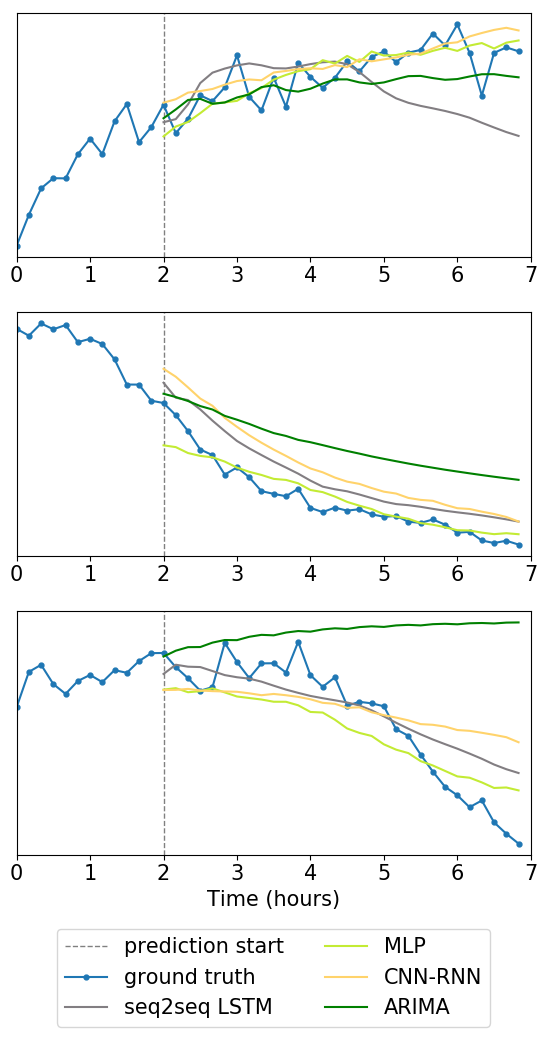

In [456]:
plot_multiple_predictions(test, locations2, pred_list_2, n_rows=3, n_cols=1, 
                          file='predictions_baselines.pdf', remove_y_labels=True)

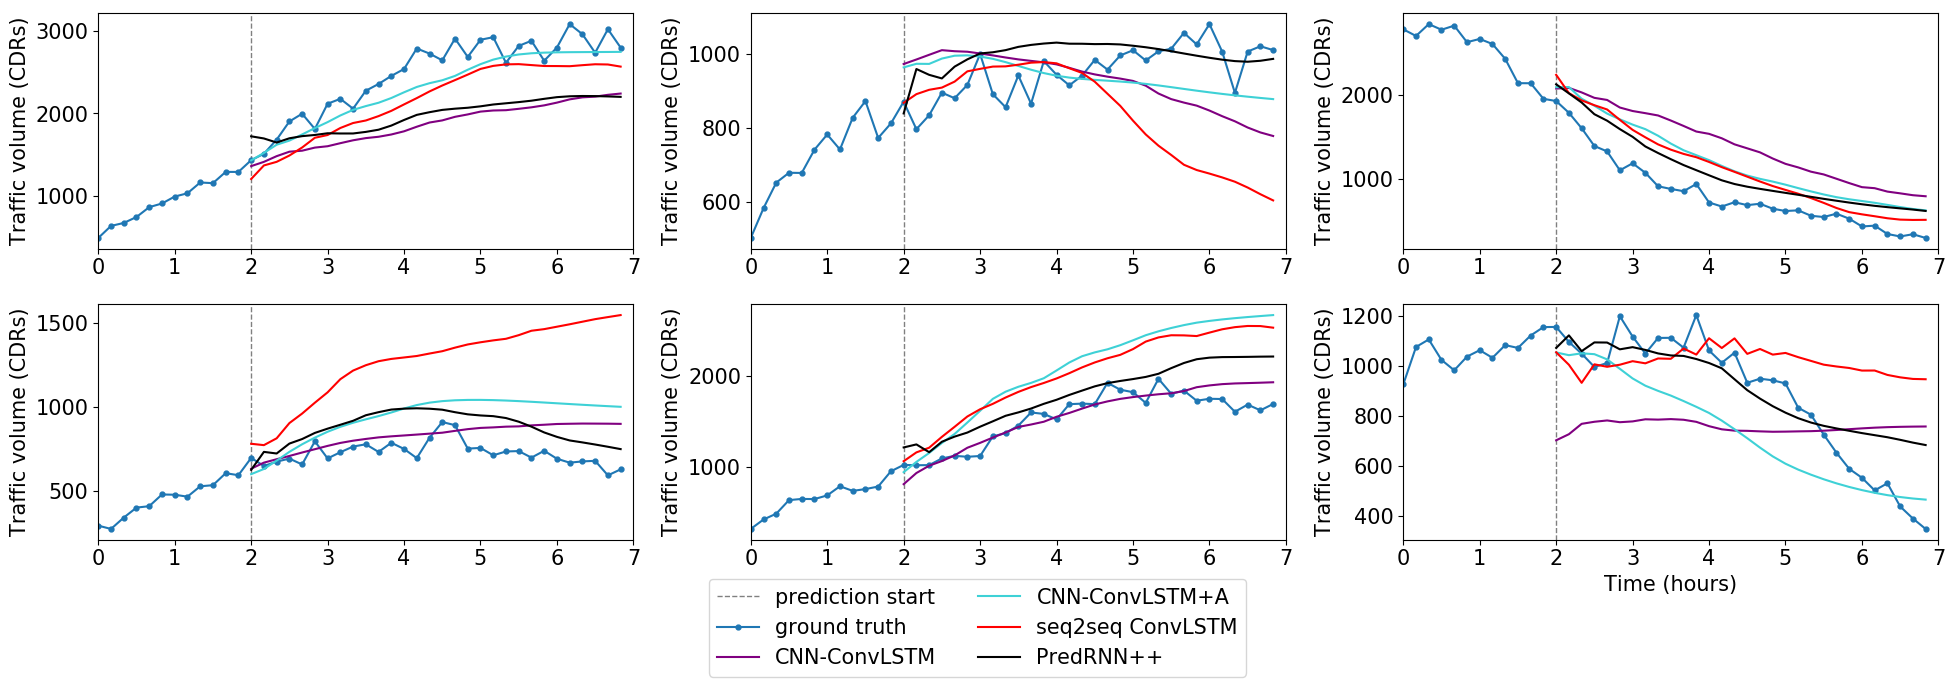

In [423]:
plot_multiple_predictions(test, locations, pred_list)

In [21]:
arima_predictions = np.load("../results/arima/p3_d1_q2/predictions.npy")
arima_predictions.shape

(30,)

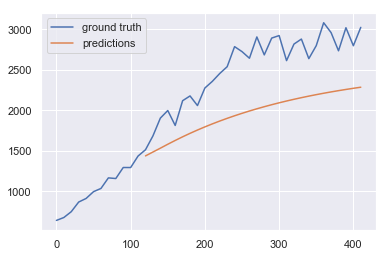

In [25]:
single_cell_prediction_2(test[50:92, 49, 58], arima_predictions)

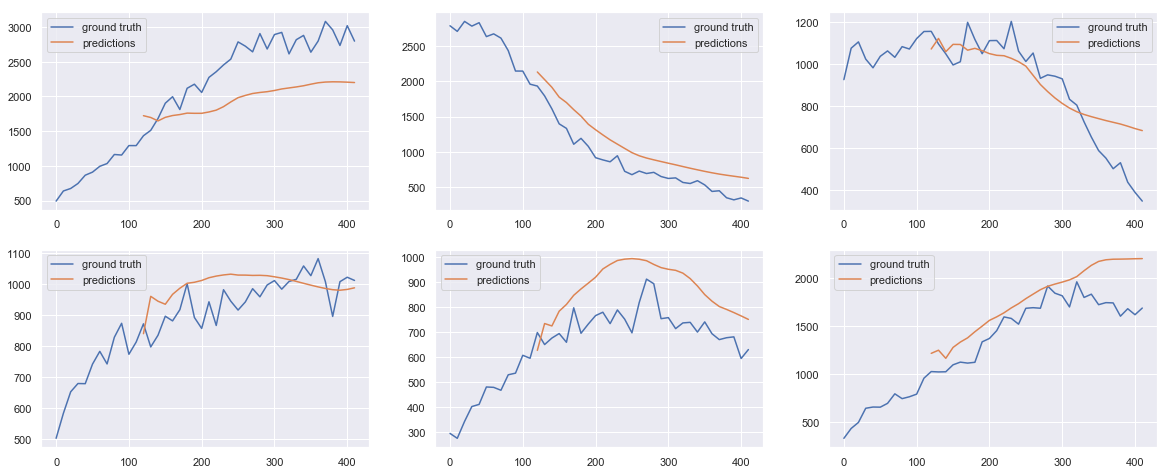

In [157]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 3, 1)
single_cell_prediction_2(test[49:91, 49, 58], predrnn_pred['49_49_58'])

plt.subplot(2, 3, 2)
single_cell_prediction_2(test[100:142, 49, 58], predrnn_pred['100_49_58'])

plt.subplot(2, 3, 3)
single_cell_prediction_2(test[650:692, 47, 58], predrnn_pred['650_47_58'])

plt.subplot(2, 3, 4)
single_cell_prediction_2(test[49:91, 38, 63], predrnn_pred['49_38_63'])

plt.subplot(2, 3, 5)
single_cell_prediction_2(test[190:232, 48, 55], predrnn_pred['190_48_55'])

plt.subplot(2, 3, 6)
single_cell_prediction_2(test[190:232, 49, 58], predrnn_pred['190_49_58'])



In [90]:
test_d, pred_d, y = test[50:92, 49, 58], predrnn_pred['50_49_58'], predrnn_pred['50_49_58_y'] 

In [91]:
y.shape

(30,)

In [152]:
predrnn_pred

{'49_38_63': array([5.8267045, 6.7376657, 6.618292 , 6.544496 , 6.786359 , 6.9352655,
        7.056196 , 7.0807652, 7.1243286, 7.1914754, 7.2316017, 7.2596135,
        7.278634 , 7.256395 , 7.2554064, 7.2479644, 7.25038  , 7.241509 ,
        7.2145724, 7.1836896, 7.1459675, 7.102413 , 7.0555196, 7.010386 ,
        6.9677196, 6.929253 , 6.89967  , 6.8867607, 6.906399 , 6.945184 ],
       dtype=float32),
 '49_49_58': array([12.498823 , 12.303052 , 11.931201 , 12.31863  , 12.515097 ,
        12.621735 , 12.77816  , 12.757593 , 12.7585335, 12.903016 ,
        13.102488 , 13.480421 , 13.9926605, 14.4589405, 14.703672 ,
        14.913068 , 15.025044 , 15.109416 , 15.239379 , 15.406719 ,
        15.517342 , 15.625905 , 15.754895 , 15.924955 , 16.077765 ,
        16.15686  , 16.183784 , 16.17483  , 16.144892 , 16.10452  ],
       dtype=float32),
 '49_47_58': array([15.380647, 16.13879 , 16.200974, 16.990873, 17.597061, 17.952951,
        18.224648, 18.364773, 18.407341, 18.439287, 18.546175, 1

In [94]:
y

array([10.90406235, 12.19355256, 13.85493873, 14.56308552, 13.17075019,
       15.47873364, 15.92405998, 15.02601231, 16.66488954, 17.28191978,
       18.01787823, 18.65069577, 20.52393738, 20.06047048, 19.44190196,
       21.42894686, 19.75415493, 21.32258203, 21.55684344, 19.21878029,
       20.76315901, 21.23041922, 19.40419572, 20.61405939, 22.7531315 ,
       21.83117629, 20.13603771, 22.28878995, 20.60808631, 22.32292202])